In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.callbacks import TensorBoard
import pandas as pd
import numpy as np
from multiprocessing import  Pool
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from time import time

In [2]:
print("open dataset")
train = pd.read_csv("../dataset/goodreads_train.csv")
# test = pd.read_csv("dataset/goodreads_test.csv")

open dataset


In [3]:
nb_note =  train["n_votes"]

In [4]:
nb_note

0         28
1          1
2         22
3          5
4          9
          ..
899995     0
899996     1
899997     1
899998     0
899999     0
Name: n_votes, Length: 900000, dtype: int64

In [5]:
y_train = train['rating']

In [6]:
train_prepro = pd.DataFrame(data=np.load(file="../prepro_train_archive.npy", allow_pickle=True), columns=['review_text'])['review_text']

In [7]:
"""dic = {}
all_stop_word = stopwords.words("english")
for stop_word in all_stop_word:
    dic[stop_word] = stop_word
def parallelize_dataframe(df, func, n_cores=4):
    print("split")

    df_split = np.array_split(df, n_cores)
    del df
    print(df_split)

    with Pool(n_cores) as pool:
        df = pd.concat(pool.map(func, df_split))

    return df
def prepro(text):
    words = text.lower()
    tokens = nltk.word_tokenize(words)
    words_stop_less = [w for w in tokens if dic.get(w) == None]
    stemmed = [PorterStemmer().stem(w) for w in words_stop_less]
    return " ".join(stemmed)

def prepro_map(data_frame):
    tqdm.pandas()
    return data_frame.progress_apply(lambda x: prepro(x))"""

'dic = {}\nall_stop_word = stopwords.words("english")\nfor stop_word in all_stop_word:\n    dic[stop_word] = stop_word\ndef parallelize_dataframe(df, func, n_cores=4):\n    print("split")\n\n    df_split = np.array_split(df, n_cores)\n    del df\n    print(df_split)\n\n    with Pool(n_cores) as pool:\n        df = pd.concat(pool.map(func, df_split))\n\n    return df\ndef prepro(text):\n    words = text.lower()\n    tokens = nltk.word_tokenize(words)\n    words_stop_less = [w for w in tokens if dic.get(w) == None]\n    stemmed = [PorterStemmer().stem(w) for w in words_stop_less]\n    return " ".join(stemmed)\n\ndef prepro_map(data_frame):\n    tqdm.pandas()\n    return data_frame.progress_apply(lambda x: prepro(x))'

In [8]:
inputs = keras.Input(shape=(1,), dtype=tf.string)
inputs2 = keras.Input(shape=(1), dtype=tf.int64)

vectorize_layer = keras.layers.TextVectorization(
    max_tokens= 494871,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
    output_sequence_length=1400,
    vocabulary=np.load('../voc2.npy')
)(inputs)

conc = keras.layers.concatenate([vectorize_layer, inputs2])

layer1 = keras.layers.Dense(64, activation=tf.keras.activations.tanh)(conc)
layer2 = keras.layers.Dense(64, activation=tf.keras.activations.tanh)(layer1)
layer3 = keras.layers.Dense(64, activation=tf.keras.activations.tanh)(layer2)
outputs = keras.layers.Dense(1, activation=tf.keras.activations.relu)(layer3)

In [9]:
model = keras.Model(inputs=[inputs, inputs2], outputs=outputs, name="mnist_model")
tensorboard = TensorBoard(log_dir="../logs/relu".format(time()))

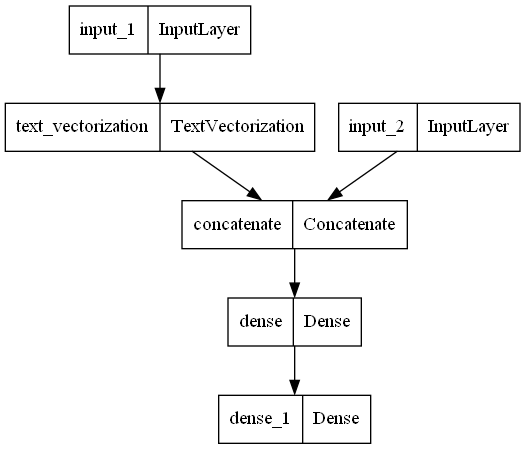

In [10]:
keras.utils.plot_model(model, "my_first_model.png")

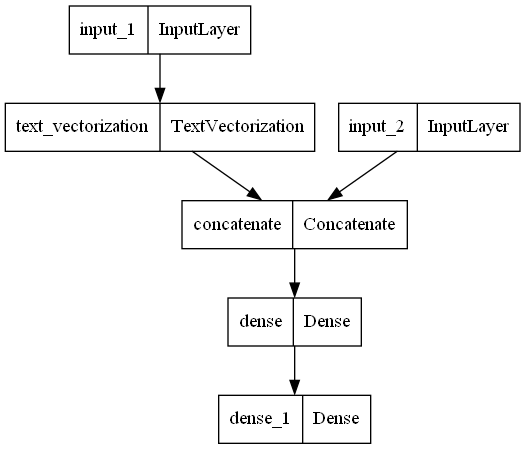

In [11]:
keras.utils.plot_model(model, "my_first_model.png")

In [12]:
model.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 1400)        0           ['input_1[0][0]']                
 ization)                                                                                         
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 1401)         0           ['text_vectorization[0]

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.mse,
              metrics=[tf.keras.metrics.Accuracy()]
              )

In [14]:
model.fit([train_prepro,nb_note], y_train, epochs=20,
                  callbacks=[
                      tf.keras.callbacks.TensorBoard(log_dir="../logs/relu"),
                  ],
                  batch_size=200000
                  )

Epoch 1/20
9/9 [==============================] - 25s 3s/step - loss: 2087521.2500 - accuracy: 0.0256
Epoch 2/20
9/9 [==============================] - 23s 3s/step - loss: 57602.1406 - accuracy: 0.0321
Epoch 3/20
9/9 [==============================] - 23s 3s/step - loss: 16393.8438 - accuracy: 0.0335
Epoch 4/20
9/9 [==============================] - 23s 3s/step - loss: 6326.9585 - accuracy: 0.0340
Epoch 5/20
9/9 [==============================] - 23s 3s/step - loss: 2731.2578 - accuracy: 0.0343
Epoch 6/20
9/9 [==============================] - 23s 3s/step - loss: 1239.9238 - accuracy: 0.0343
Epoch 7/20
9/9 [==============================] - 23s 3s/step - loss: 552.8607 - accuracy: 0.0344
Epoch 8/20
9/9 [==============================] - 22s 2s/step - loss: 232.3226 - accuracy: 0.0344
Epoch 9/20
9/9 [==============================] - 22s 2s/step - loss: 102.2282 - accuracy: 0.0344
Epoch 10/20
9/9 [==============================] - 22s 2s/step - loss: 49.4841 - accuracy: 0.0344
Epoch 11/

In [15]:
#model.save("../models_trained/linear_model_2")